In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import scikit_posthocs as sp
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

In [32]:
tests = {'mv_models_f2':'embed'}

In [19]:
name_models=['knn', 'rf', 'ab', 'cb', 'gb', 'mlp']

In [20]:
name_models=['knn', 'rf']

In [21]:
metrics=['rouge-1', 'rouge-2', 'rouge-l']

In [22]:
columns = [ "{}_{}".format(i,j) for i in name_models for j in metrics]

In [33]:
results = []
for num_test in range(1,31):
    
    for name_test, approach in tests.items():
        
        path_to_save = "/scratch/cinthiasouza/mv-text-summarizer/notebook/{}".format(name_test)
        result_comb = pd.read_csv("{}/test_{}/summaries/{}.csv".format(path_to_save, num_test, 'comb'))
                                  
        results.append(result_comb.describe().T['mean'])

In [34]:
df = pd.concat(results, axis=1).T

In [35]:
df.describe().T[['mean', 'std']]

,mean,std
knn_rouge-1,0.455790,2.258405e-16
knn_rouge-2,0.167076,0.000000e+00
knn_rouge-l,0.287406,2.258405e-16
rf_rouge-1,0.467260,1.562590e-03
rf_rouge-2,0.187720,1.478210e-03
rf_rouge-l,0.299805,1.183201e-03
ab_rouge-1,0.469739,1.693804e-16
ab_rouge-2,0.189274,2.823006e-17
ab_rouge-l,0.301486,2.258405e-16
gb_rouge-1,0.472384,2.258405e-16


In [36]:
for metric in metrics:
    
    print("\n\n Metric: {} \n\n".format(metric))
    
    knn =  df['knn_{}'.format(metric)].to_list()
    rf = df['rf_{}'.format(metric)].to_list()
    ab = df['ab_{}'.format(metric)].to_list()
    cb = df['cb_{}'.format(metric)].to_list()
    gb = df['gb_{}'.format(metric)].to_list()
    mlp = df['mlp_{}'.format(metric)].to_list()

    columns=['mlp_{}'.format(metric), 'knn_{}'.format(metric), 'rf_{}'.format(metric), 'ab_{}'.format(metric), 'cb_{}'.format(metric), 'gb_{}'.format(metric)]

    x = np.array([knn, rf, ab, cb, gb, mlp])

    print(stats.friedmanchisquare(knn, rf, ab, cb, gb, mlp))
    print("\n")

    result = sp.posthoc_nemenyi_friedman(x.T)
    print(result)
    print("\n")

    data = df[columns]
    result = autorank(data, alpha=0.05, verbose=False, approach='frequentist')

    print(create_report(result))
    print("\n")
    print(result)



 Metric: rouge-1 


FriedmanchisquareResult(statistic=134.49523809523816, pvalue=2.643991053940698e-27)


        0         1         2         3         4         5
0  1.0000  0.091700  0.001000  0.001000  0.001000  0.900000
1  0.0917  1.000000  0.383626  0.001000  0.001000  0.035614
2  0.0010  0.383626  1.000000  0.267024  0.001000  0.001000
3  0.0010  0.001000  0.267024  1.000000  0.267024  0.001000
4  0.0010  0.001000  0.001000  0.267024  1.000000  0.001000
5  0.9000  0.035614  0.001000  0.001000  0.001000  1.000000




/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


The statistical analysis was conducted for 6 populations with 30 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.293). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and reject the null hypothesis (p=0.000) that thedata is homoscedastic. Thus, we assume that our data is heteroscedastic.
Because we have more than two populations and the populations are normal but heteroscedastic, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the mean values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the mean value (M), the standard deviation (SD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference

/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/autorank/_util.py:102: RuntimeWarning: invalid value encountered in double_scalars
  return (np.mean(x) - np.mean(y)) / _pooled_std(x, y)
/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/scratch/cinthiasouza/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2303: Run

The statistical analysis was conducted for 6 populations with 30 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.216). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and reject the null hypothesis (p=0.000) that thedata is homoscedastic. Thus, we assume that our data is heteroscedastic.
Because we have more than two populations and the populations are normal but heteroscedastic, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the mean values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the mean value (M), the standard deviation (SD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference

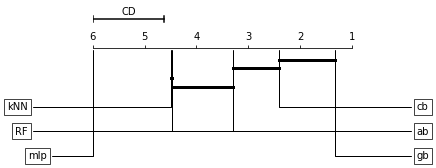

In [17]:
import matplotlib.pyplot as plt

# input data
cd = 1.376
knn = 4.5
mlp = 6
rf = 3.3
ab = 4.47
cb = 2.4
gb = 1.33
limits=(6,1)

fig, ax = plt.subplots(figsize=(6,1.8))
plt.subplots_adjust(left=0.2, right=0.8)

# set up plot
ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

# CD bar
ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k") 
ax.text(limits[0]-cd/2., 0.92, "CD", ha="center", va="bottom") 

# annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")
ax.annotate("kNN", xy=(knn, 0.6), xytext=(-0.25,0),ha="right",  **kw)
ax.annotate("RF", xy=(rf, 0.6), xytext=(-0.25,-0.25),ha="right",  **kw)
ax.annotate("ab", xy=(ab, 0.6), xytext=(1.25, -0.25),ha="left",  **kw)
ax.annotate("cb", xy=(cb, 0.6), xytext=(1.25,0),ha="left",  **kw)
ax.annotate("gb", xy=(gb, 0.6), xytext=(1.25,-0.5),ha="left",  **kw)
ax.annotate("mlp", xy=(mlp, 0.6), xytext=(-0.25, -0.5),ha="left",  **kw)

#bars
ax.plot([knn, ab],[0.3,0.3], color="k", lw=3)
ax.plot([ab,rf],[0.2,0.2], color="k", lw=3)
ax.plot([rf,cb],[0.4,0.4], color="k", lw=3)
ax.plot([cb,gb],[0.48,0.48], color="k", lw=3)

plt.show()

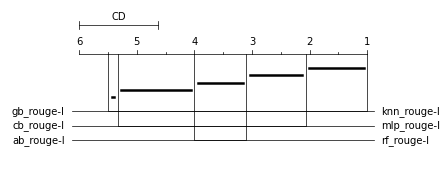

In [236]:
ankResult(rankdf=
             meanrank      mean           std  ci_lower  ci_upper effect_size  \
mlp_rouge-1  6.000000  0.415314  2.235717e-03  0.414158  0.416469         0.0   
knn_rouge-1  4.500000  0.428947  2.258405e-16  0.428947  0.428947   -8.624143   
ab_rouge-1   3.466667  0.429126  2.258405e-16  0.429126  0.429126   -8.737086   
rf_rouge-1   3.300000  0.429071  1.726216e-03  0.428179  0.429964   -6.888134   
cb_rouge-1   2.400000  0.429524  1.129203e-16  0.429524  0.429524   -8.988798   
gb_rouge-1   1.333333  0.430008  1.129203e-16  0.430008  0.430008   -9.294866   

Critical difference (CD) diagram of the post-hoc Nemenyi test (α = 0.10). The difference between two algorithms is significant if the gap between their ranks is larger than CD. There is a line between two algorithms if the
rank gap between them is smaller than CD.

In [288]:
6-4.63

1.37

In [ ]:
RankResult(rankdf=
             meanrank      mean           std  ci_lower  ci_upper effect_size  \
rf_rouge-1   6.000000  0.454165  1.113028e-03  0.453589   0.45474         0.0   
knn_rouge-1  4.633333  0.474582  2.258405e-16  0.474582  0.474582  -25.941731   
mlp_rouge-1  4.366667  0.474940  1.146622e-03  0.474347  0.475533  -18.385839   
cb_rouge-1   3.000000  0.481768  3.952209e-16  0.481768  0.481768  -35.072329   
gb_rouge-1   2.000000  0.487850  2.823006e-16   0.48785   0.48785  -42.800694   
ab_rouge-1   1.000000  0.490332  1.693804e-16  0.490332  0.490332    -45.9542  